In [3]:
# libraries
import pandas as pd
import numpy as np

In [4]:
# read csv
person = pd.read_csv('../synpuff/person.csv')
condition_occurrence = pd.read_csv('../synpuff/condition_occurrence.csv')
drug_exposure = pd.read_csv('../synpuff/drug_exposure.csv')
concept = pd.read_csv('../synpuff/concept.csv')
#measurement_labelled = pd.read_csv('synpuff/measurement.csv')
#procedure_labelled = pd.read_csv('synpuff/procedure.csv')

In [5]:
concept_lookup = {c.concept_id: c.concept_name for c in concept.itertuples()}

In [6]:
def make_labels(df):
    for c in df.columns:
        if 'concept_id' in c:
            df[c.replace('_id', '_label')] = df[c].map(concept_lookup)
        if 'concept_id' in c or 'source' in c or len(df[df[c].notna()])==0:
            df = df.drop(c, axis=1)
    return df

In [7]:
person_labelled = make_labels(person)
condition_occurrence_labelled = make_labels(condition_occurrence)
drug_exposure_labelled = make_labels(drug_exposure)

In [8]:
person_labelled.head()

,location_id,person_id,year_of_birth,month_of_birth,day_of_birth,race_concept_label,ethnicity_concept_label,gender_source_concept_label,race_source_concept_label,ethnicity_source_concept_label,gender_concept_label
0,247,1468935,1920,1,1,White,Not Hispanic or Latino,NaN,NaN,NaN,MALE
1,994,2299017,1923,1,1,White,Not Hispanic or Latino,NaN,NaN,NaN,MALE
2,197,1238988,1924,1,1,White,Not Hispanic or Latino,NaN,NaN,NaN,MALE
3,2296,1712715,1934,1,1,White,Not Hispanic or Latino,NaN,NaN,NaN,MALE
4,84,899595,1941,1,1,White,Not Hispanic or Latino,NaN,NaN,NaN,MALE


In [9]:
person_labelled['gender_concept_label'].value_counts()

gender_concept_label
FEMALE    1686
MALE      1286
Name: count, dtype: int64

In [132]:
person_code = 1705545

In [133]:
person_labelled[person_labelled['person_id']==person_code]

,location_id,person_id,year_of_birth,month_of_birth,day_of_birth,race_concept_label,ethnicity_concept_label,gender_source_concept_label,race_source_concept_label,ethnicity_source_concept_label,gender_concept_label
1020,1083,1705545,1942,1,1,White,Not Hispanic or Latino,NaN,NaN,NaN,FEMALE


Person is [person_code]

In [134]:
condition_occurrence_labelled[condition_occurrence_labelled['person_id']==person_code]

,condition_occurrence_id,person_id,condition_start_date,condition_end_date,provider_id,visit_occurrence_id,condition_concept_label,condition_type_concept_label,condition_source_concept_label,condition_status_concept_label
1730,211914386,1705545,2009-03-07,2009-03-07,202902.0,81813297,Disorder of bursa of shoulder region,Outpatient header - 1st position,Disorders of bursae and tendons in shoulder re...,NaN
2817,211914283,1705545,2008-08-17,2008-08-17,6967.0,81813261,Sciatica,Outpatient header - 1st position,Sciatica,NaN
3059,211914312,1705545,2008-09-16,2008-09-17,418424.0,81813272,Complication due to diabetes mellitus,Outpatient header - 1st position,Secondary diabetes mellitus with unspecified c...,NaN
6445,211914366,1705545,2008-06-09,2008-06-09,231846.0,81813291,Neoplasm of uncertain behavior of digestive organ,Outpatient header - 1st position,"Neoplasm of uncertain behavior of stomach, int...",NaN
10069,211914317,1705545,2009-01-04,2009-01-04,185897.0,81813273,Osteoporosis,Outpatient header - 1st position,"Osteoporosis, unspecified",NaN
12857,211914437,1705545,2010-09-23,2010-09-23,205584.0,81813319,Chronic ischemic heart disease,Outpatient header - 1st position,"Chronic ischemic heart disease, unspecified",NaN
13389,211914352,1705545,2009-11-24,2009-11-24,19766.0,81813288,Pure red cell aplasia,Outpatient header - 1st position,Constitutional red blood cell aplasia,NaN
14264,211914343,1705545,2010-10-03,2010-10-03,300167.0,81813284,Precordial pain,Outpatient header - 1st position,Precordial pain,NaN
17555,211914270,1705545,2010-03-03,2010-03-03,239448.0,81813255,Obesity,Outpatient header - 1st position,"Obesity, unspecified",NaN
18324,211914388,1705545,2009-03-07,2009-03-07,202902.0,81813297,Disorder of bursa of shoulder region,Outpatient header - 1st position,Disorders of bursae and tendons in shoulder re...,NaN


In [143]:
condition_occurrence_labelled[condition_occurrence_labelled['person_id']==person_code].sort_values(by='condition_start_date')

,condition_occurrence_id,person_id,condition_start_date,condition_end_date,provider_id,visit_occurrence_id,condition_concept_label,condition_type_concept_label,condition_source_concept_label,condition_status_concept_label
69483,211914324,1705545,2008-01-27,2008-01-27,454063.0,81813274,Hypocalcemia,Outpatient header - 1st position,Hypocalcemia,NaN
27286,211914361,1705545,2008-04-01,2008-04-01,582742.0,81813290,Malignant neoplasm of nipple and areola of fem...,Outpatient header - 1st position,Malignant neoplasm of nipple and areola of fem...,NaN
51696,211914516,1705545,2008-05-20,2008-05-20,6513.0,81813355,Insomnia,Outpatient header - 1st position,"Insomnia, unspecified",NaN
6445,211914366,1705545,2008-06-09,2008-06-09,231846.0,81813291,Neoplasm of uncertain behavior of digestive organ,Outpatient header - 1st position,"Neoplasm of uncertain behavior of stomach, int...",NaN
25188,211914263,1705545,2008-07-23,2008-07-23,7915.0,81813249,Metastatic malignant neoplasm to bone,Outpatient header - 1st position,Secondary malignant neoplasm of bone and bone ...,NaN
22955,211914417,1705545,2008-08-07,2008-08-07,380199.0,81813309,Primary malignant neoplasm of tonsil,Outpatient header - 1st position,Malignant neoplasm of tonsil,NaN
29269,211914416,1705545,2008-08-07,2008-08-07,380199.0,81813309,Primary malignant neoplasm of buccal mucosa,Outpatient header - 1st position,Malignant neoplasm of cheek mucosa,NaN
2817,211914283,1705545,2008-08-17,2008-08-17,6967.0,81813261,Sciatica,Outpatient header - 1st position,Sciatica,NaN
3059,211914312,1705545,2008-09-16,2008-09-17,418424.0,81813272,Complication due to diabetes mellitus,Outpatient header - 1st position,Secondary diabetes mellitus with unspecified c...,NaN
64853,211914328,1705545,2008-09-26,2008-09-26,261077.0,81813277,Varicose veins of lower extremity with ulcer,Outpatient header - 1st position,Varicose veins of lower extremities with ulcer,NaN


In [135]:
condition_occurrence[condition_occurrence['person_id']==person_code]

,condition_occurrence_id,person_id,condition_concept_id,condition_start_date,condition_start_datetime,condition_end_date,condition_end_datetime,condition_type_concept_id,stop_reason,provider_id,visit_occurrence_id,visit_detail_id,condition_source_value,condition_source_concept_id,condition_status_source_value,condition_status_concept_id,condition_concept_label
1730,211914386,1705545,442256,2009-03-07,NaN,2009-03-07,NaN,38000230,NaN,202902.0,81813297,NaN,72610,44823370,NaN,NaN,Disorder of bursa of shoulder region
2817,211914283,1705545,372409,2008-08-17,NaN,2008-08-17,NaN,38000230,NaN,6967.0,81813261,NaN,7243,44821150,NaN,NaN,Sciatica
3059,211914312,1705545,442793,2008-09-16,NaN,2008-09-17,NaN,38000230,NaN,418424.0,81813272,NaN,24991,44829877,NaN,NaN,Complication due to diabetes mellitus
6445,211914366,1705545,40492458,2008-06-09,NaN,2008-06-09,NaN,38000230,NaN,231846.0,81813291,NaN,2352,44832182,NaN,NaN,Neoplasm of uncertain behavior of digestive organ
10069,211914317,1705545,80502,2009-01-04,NaN,2009-01-04,NaN,38000230,NaN,185897.0,81813273,NaN,73300,44822235,NaN,NaN,Osteoporosis
12857,211914437,1705545,315286,2010-09-23,NaN,2010-09-23,NaN,38000230,NaN,205584.0,81813319,NaN,4149,44821953,NaN,NaN,Chronic ischemic heart disease
13389,211914352,1705545,140065,2009-11-24,NaN,2009-11-24,NaN,38000230,NaN,19766.0,81813288,NaN,28401,44829910,NaN,NaN,Pure red cell aplasia
14264,211914343,1705545,134159,2010-10-03,NaN,2010-10-03,NaN,38000230,NaN,300167.0,81813284,NaN,78651,44824627,NaN,NaN,Precordial pain
17555,211914270,1705545,433736,2010-03-03,NaN,2010-03-03,NaN,38000230,NaN,239448.0,81813255,NaN,27800,44833387,NaN,NaN,Obesity
18324,211914388,1705545,442256,2009-03-07,NaN,2009-03-07,NaN,38000230,NaN,202902.0,81813297,NaN,72610,44823370,NaN,NaN,Disorder of bursa of shoulder region


In [136]:
drug_exposure_labelled[drug_exposure_labelled['person_id']==person_code]

,quantity,days_supply,provider_id,visit_occurrence_id,drug_exposure_id,person_id,drug_exposure_start_date,drug_exposure_end_date,drug_type_concept_label,route_concept_label,drug_source_concept_label,drug_concept_label
57,NaN,NaN,23474.0,81813296.0,92390894,1705545,2008-07-26,2008-08-25,Prescription dispensed in pharmacy,NaN,NaN,cyclophosphamide
991,20.0,30.0,NaN,NaN,92390883,1705545,2008-02-11,2008-03-11,Prescription dispensed in pharmacy,NaN,NaN,ibuprofen 200 MG Oral Tablet
2301,60.0,30.0,NaN,NaN,92390796,1705545,2009-12-06,2010-01-04,Prescription dispensed in pharmacy,NaN,NaN,NaN
2417,90.0,30.0,NaN,NaN,92390792,1705545,2008-08-14,2008-09-12,Prescription dispensed in pharmacy,NaN,NaN,24 HR diltiazem hydrochloride 180 MG Extended ...
2983,60.0,30.0,NaN,NaN,92390842,1705545,2009-09-21,2009-10-20,Prescription dispensed in pharmacy,NaN,NaN,NaN
4649,60.0,30.0,NaN,NaN,92390810,1705545,2008-04-21,2008-05-20,Prescription dispensed in pharmacy,NaN,Metformin hydrochloride 850 MG Oral Tablet [Gl...,metformin hydrochloride 850 MG Oral Tablet [Gl...
5943,60.0,30.0,NaN,NaN,92390776,1705545,2009-06-02,2009-07-01,Prescription dispensed in pharmacy,NaN,NaN,morphine sulfate 10 MG/ML Injectable Solution
6389,30.0,30.0,NaN,NaN,92390813,1705545,2010-06-13,2010-07-12,Prescription dispensed in pharmacy,NaN,NaN,lovastatin 10 MG Oral Tablet
7370,60.0,30.0,NaN,NaN,92390834,1705545,2009-12-10,2010-01-08,Prescription dispensed in pharmacy,NaN,NaN,tolazamide 250 MG Oral Tablet
7681,30.0,30.0,NaN,NaN,92390755,1705545,2009-06-23,2009-07-22,Prescription dispensed in pharmacy,NaN,NaN,citalopram 40 MG Oral Tablet


In [137]:
#procedure_occurrence_labelled[procedure_occurrence_labelled['person_id']==person_code]

In [138]:
drug_exposure_labelled['drug_exposure_start_date'].min()


'2007-12-18'

In [139]:
drug_exposure_labelled['drug_exposure_start_date'].max()


'2010-12-31'

<Axes: >

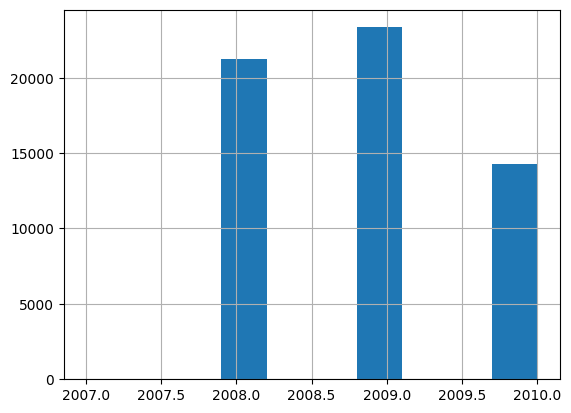

In [140]:
pd.to_datetime(drug_exposure_labelled['drug_exposure_start_date']).dt.year.hist()


<Axes: >

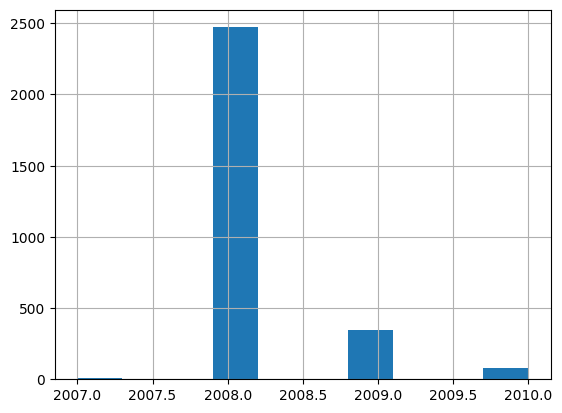

In [141]:
pd.to_datetime(drug_exposure_labelled.groupby(['person_id'])['drug_exposure_start_date'].min()).dt.year.hist()

In [142]:
drug_exposure_labelled['drug_exposure_start_date'].dt.year.hist()

AttributeError: Can only use .dt accessor with datetimelike values